In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Importing the Cleveland data
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv", index_col=0)

In [22]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [27]:
# Creating a benchmark model

# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
lr_classifier = LogisticRegression(tol=1e-6, solver='liblinear', max_iter=200,)

In [24]:
# Separting the data into features and labels
X = df_cleveland.loc[:, df_cleveland.columns != "num"]
y = df_cleveland["num"]

In [85]:
# Importing the cross validation function
from sklearn.model_selection import cross_validate

def cross_validation(model):
    """
    Performs cross validation and displays evaluation metrics
    param model: A scikit-learn estimator object
    return: Display evaluation metrics
    """
    # Training the model using cross validation
    cv_results = cross_validate(model, X, y, cv=8,
                                scoring=["recall", "precision", "accuracy"],
                                return_train_score=True)
    
    # Displaying the training accuracy metrics
    print("The mean training accuracy is", cv_results["train_accuracy"].mean())
    print("The mean training recall is", cv_results["train_recall"].mean())
    print("The mean training precision is", cv_results["train_precision"].mean())

    print('\n')

    # Displaying the test accuracy metrics
    print("The mean test accuracy is", cv_results["test_accuracy"].mean())
    print("The mean test recall is", cv_results["test_recall"].mean())
    print("The mean test precision is", cv_results["test_precision"].mean())

In [86]:
# Evaluating the benchmark model
cross_validation(lr_classifier)

The mean training accuracy is 0.8552123552123552
The mean training recall is 0.8175245098039216
The mean training precision is 0.862710321716577


The mean test accuracy is 0.8412162162162162
The mean test recall is 0.7965686274509804
The mean test precision is 0.8657186950046858


/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


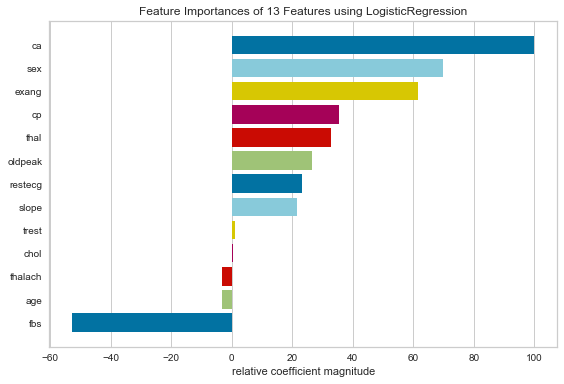

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12f59b780>,
                   model=None)

In [87]:
# Visualzing the feature importance from the logistic regression model

# Importing the function
from yellowbrick.model_selection.importances import feature_importances

# Creating the graph
feature_importances(lr_classifier, X, y)

In [81]:
# Creating a random forest model

# Importing the logistic regression model
from sklearn.ensemble import RandomForestClassifier

# Creating a logistic regression model
rf_classifier = RandomForestClassifier(n_estimators=150)

In [88]:
# Evaluating the model
cross_validation(rf_classifier)

The mean training accuracy is 1.0
The mean training recall is 1.0
The mean training precision is 1.0


The mean test accuracy is 0.8074324324324325
The mean test recall is 0.7749183006535947
The mean test precision is 0.816444356082514


/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


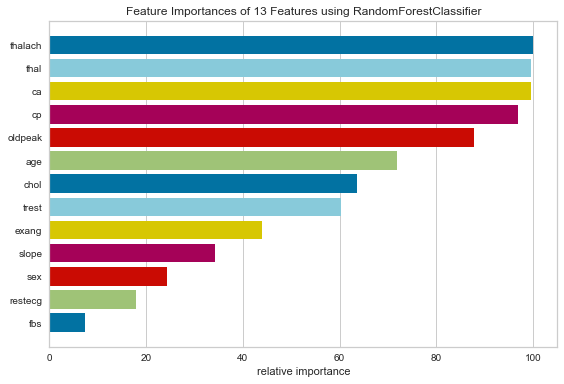

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12f59bc18>,
                   model=None)

In [89]:
# Visualzing the feature importance for the random forest model

# Creating the graph
feature_importances(rf_classifier, X, y)

In [94]:
# Importing the model class
from sklearn.neighbors import KNeighborsClassifier

# Creating the model
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [95]:
cross_validation(knn_classifier)

The mean training accuracy is 0.7717181467181466
The mean training recall is 0.742454481792717
The mean training precision is 0.7592709693999404


The mean test accuracy is 0.652027027027027
The mean test recall is 0.6123366013071896
The mean test precision is 0.6287463450292397


In [96]:
from sklearn.naive_bayes import GaussianNB

# Creating the model
nb_classifier = GaussianNB()

In [97]:
cross_validation(nb_classifier)

The mean training accuracy is 0.8527992277992278
The mean training recall is 0.8091911764705882
The mean training precision is 0.8644866074334999


The mean test accuracy is 0.831081081081081
The mean test recall is 0.7888071895424836
The mean test precision is 0.8483696042519572


In [98]:
from sklearn.svm import SVC

# Creating the model
svm_classifier = SVC()

In [99]:
cross_validation(svm_classifier)

The mean training accuracy is 0.6805019305019305
The mean training recall is 0.5047006302521009
The mean training precision is 0.7210603184054574


The mean test accuracy is 0.6655405405405406
The mean test recall is 0.4742647058823529
The mean test precision is 0.7114448051948052


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier()

In [102]:
cross_validation(gbm_classifier)

The mean training accuracy is 0.9942084942084942
The mean training recall is 0.9916491596638656
The mean training precision is 0.9958242867815288


The mean test accuracy is 0.7871621621621622
The mean test recall is 0.767156862745098
The mean test precision is 0.7993569501319114


/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


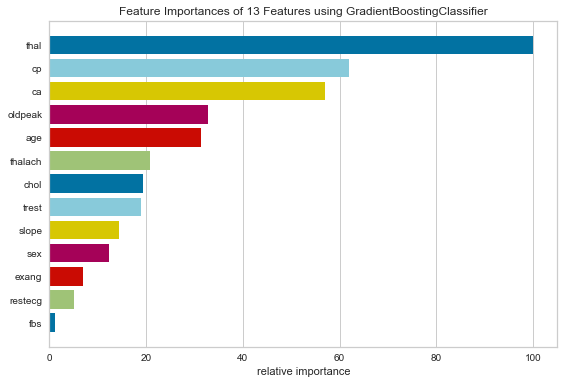

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12f857c88>,
                   model=None)

In [103]:
# Visualizing the feature importance
feature_importances(gbm_classifier, X, y)